In [14]:
# networkx

In [10]:
import requests
import json
import pandas as pd
import glob

import collections
import itertools

import matplotlib.pyplot as plt
import japanize_matplotlib
import math

%matplotlib inline

pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
allfiles= glob.glob('*.xlsx')
allfiles

['2022_0120_KRC様.xlsx',
 '2022_0124_エビス株式会社.xlsx',
 '2022_0124_日本乳化剤株式会社.xlsx',
 '2022_0124_木戸紙業株式会社.xlsx',
 '2022_0124_株式会社浮間化学研究所.xlsx',
 '2022_0124_関東化学株式会社.xlsx']

In [5]:
# test_name = pd.DataFrame(list(G.nodes)) # 描く人のユニークネーム
# #print(len(test))
# test_name = test_name.rename(columns={0:'name'})
# test_name = test_name.reset_index()
# test_name = test_name.rename(columns={'index':'id'})
# test_name['from'] = test_name['name'].copy()
# test_name['to'] = test_name['name'].copy()
# test_name.head()

# test_from = test_name[['from', 'id']]
# test_from = test_from.rename(columns={'id':'from_id'})
# #display(test_from.head())

# test_to = test_name[['to', 'id']]
# test_to = test_to.rename(columns={'id':'to_id'})
# #display(test_to.head())

# #G.edges
# #display(list(G.edges)) # つながり
# #print(len(list(G.edges)))
# temp_connection_list = pd.DataFrame(list(G.edges))
# temp_connection_list = temp_connection_list.rename(columns={0:'from'})
# temp_connection_list = temp_connection_list.rename(columns={1:'to'})
# temp_connection_list.head()

# #display(edge_width) # 線の太さ
# #display(len(edge_width))
# temp_edge_width = pd.DataFrame(edge_width)
# temp_edge_width = temp_edge_width.rename(columns={0:'Volume'})
# #temp_edge_width.head()

# # マージ
# temp = pd.merge(temp_connection_list, temp_edge_width, left_index=True, right_index=True)
# #temp.head()

# temp = pd.merge(temp, test_from, on='from', how='left')
# temp = pd.merge(temp, test_to, on='to', how='left')
# temp['group'] = 0
# temp = temp[['from', 'to', 'from_id', 'to_id', 'group', 'Volume']]
# display(temp.head())

# #print(len(node_size)) # 円の大きさ
# df_node_volume = pd.DataFrame(node_size)
# df_node_volume = df_node_volume.rename(columns={0:'node_volume'})
# #display(df_node_volume.head())

# # マージする
# temp_volume = pd.merge(test_from, df_node_volume, left_index=True, right_index=True)
# display(temp_volume.head())

In [6]:
df = pd.read_excel('2022_0124_関東化学株式会社.xlsx', skiprows=2) # '2022_0124_関東化学株式会社.xlsx'
df.head()

,公報番号(内部),発明等の名称,出願日,出願番号(標準),公報番号(標準),公報種別(標準),公開・公表番号,公開・公表日,発明者または考案者(最新),発明者または考案者(筆頭),ＩＰＣ８(最新),"ＩＰＣ８(最新,筆頭)",被引用出願数,分割の表示,査定種別
0,AA21172642,ＳＡＲＳ－ＣｏＶ－２由来ヌクレオカプシド断片および該断片を用いて抗ＳＡＲＳ－ＣｏＶ－２抗体を...,2020-04-30,P2020-080597,2021-172642,A,特開2021-172642,2021-11-01,梁 明秀;山岡 悠太郎;相澤 大輔,梁 明秀,C07K 14/165@AFI(JP);C07K 16/10@ALI(JP);C12M ...,C07K 14/165@AFI(JP),NaN,NaN,査定無し
1,AA21139015,無電解金めっき用組成物,2020-03-06,P2020-038971,2021-139015,A,特開2021-139015,2021-09-16,津田 貴大;徳久 智明;森田 智之;清水 寿和,津田 貴大,C23C 18/16@AFI(JP);C23C 18/42@ALI(JP);H01L ...,C23C 18/16@AFI(JP),NaN,NaN,査定無し
2,AA21073901,アルコールの濃度を測定する試験片および測定する方法,2019-11-08,P2019-203068,2021-073901,A,特開2021-073901,2021-05-20,相澤 大輔,相澤 大輔,C12Q 1/32@AFI(JP),C12Q 1/32@AFI(JP),NaN,NaN,査定無し
3,AA21006523,スピロアクリダン系化合物、該化合物を含有する正孔輸送材料および該化合物を正孔輸送層に含む有機...,2020-06-26,P2020-110333,2021-006523,A,特開2021-006523,2021-01-21,佐藤 輝幸;西尾 太一;吉廣 大佑;岩井 新;新内 聡暢,佐藤 輝幸,C07D 221/20@AFI(JP);C09K 11/06@ALI(JP);H01L ...,C07D 221/20@AFI(JP),NaN,NaN,査定無し
4,AA20202320,過酸化水素分解抑制剤,2019-06-12,P2019-109266,2020-202320,A,特開2020-202320,2020-12-17,高橋 秀樹;荻原 えりな;廖 本男;呉 柏衡;李 懿,高橋 秀樹,H01L 21/306@AFI(JP),H01L 21/306@AFI(JP),NaN,NaN,査定無し


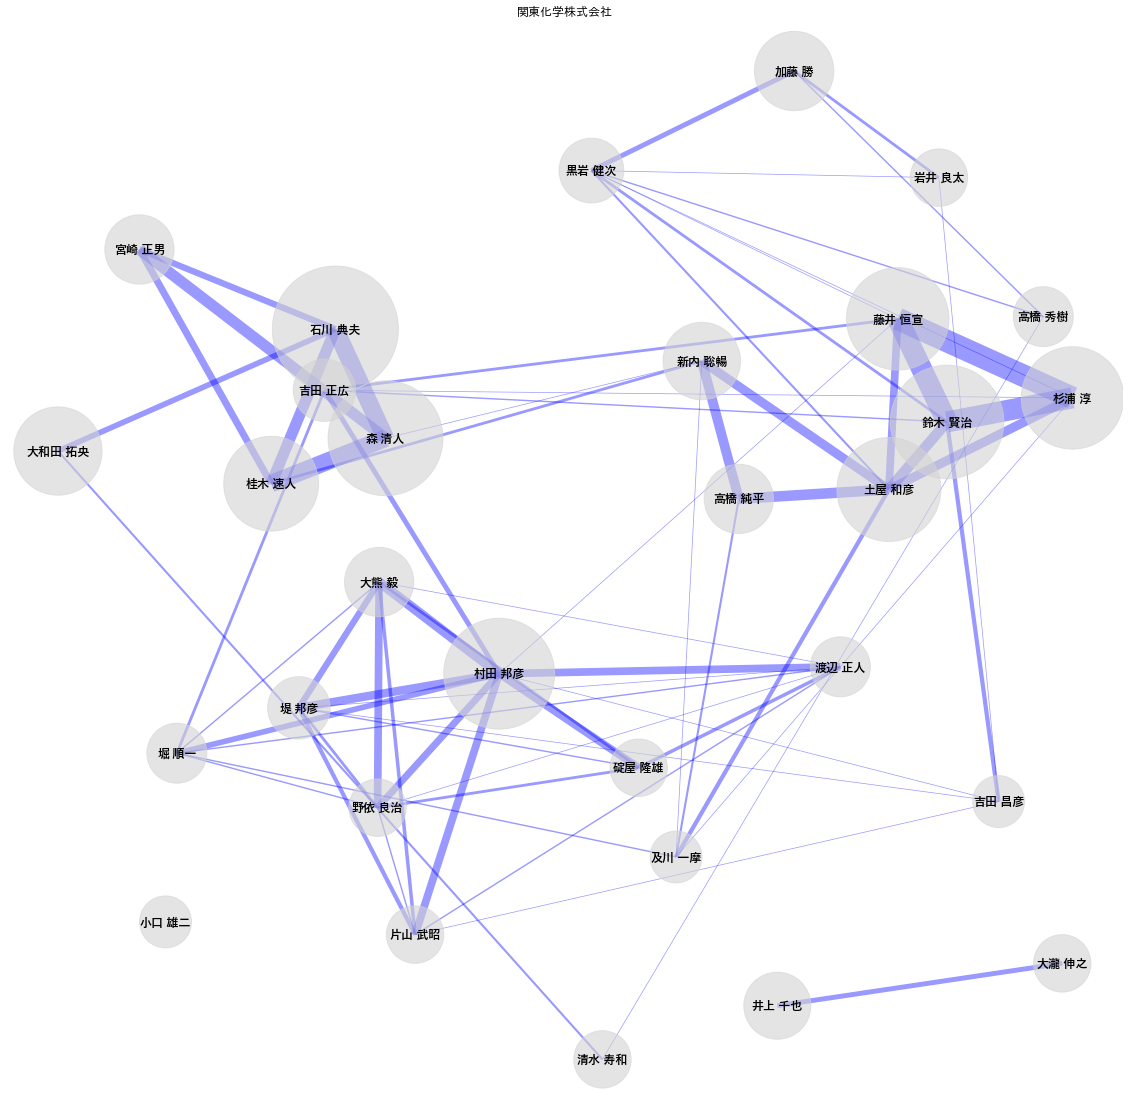

,from,from_id,node_Volume
0,石川 典夫,0,15900
1,森 清人,1,13200
2,鈴木 賢治,2,12900
3,村田 邦彦,3,12300
4,土屋 和彦,4,10800


,from,to,from_id,to_id,group,edge_Volume,node_Volume
0,石川 典夫,大和田 拓央,0,8.0000,関東化学株式会社,5.6000,15900
1,石川 典夫,森 清人,0,1.0000,関東化学株式会社,17.5000,15900
2,石川 典夫,宮崎 正男,0,13.0000,関東化学株式会社,6.3000,15900
3,石川 典夫,桂木 速人,0,7.0000,関東化学株式会社,11.2000,15900
4,森 清人,新内 聡暢,1,10.0000,関東化学株式会社,0.7000,13200
5,森 清人,桂木 速人,1,7.0000,関東化学株式会社,17.5000,13200
6,森 清人,宮崎 正男,1,13.0000,関東化学株式会社,11.2000,13200
7,鈴木 賢治,吉田 昌彦,2,28.0000,関東化学株式会社,4.2000,12900
8,鈴木 賢治,土屋 和彦,2,4.0000,関東化学株式会社,10.5000,12900
9,鈴木 賢治,黒岩 健次,2,15.0000,関東化学株式会社,2.8000,12900


In [13]:
df = pd.read_excel('2022_0124_関東化学株式会社.xlsx', skiprows=2) # '2022_0124_関東化学株式会社.xlsx'
file = '2022_0124_関東化学株式会社.xlsx'
file_temp = file.split('_')[2]
file_temp = file_temp.split('.x')[0]
df = df[['出願日', '発明等の名称', '発明者または考案者(最新)']]
df['発明者または考案者(最新)'] = df['発明者または考案者(最新)'].str.replace('　', ' ')
df2 = pd.concat([df, df['発明者または考案者(最新)'].str.split(';', expand=True)], axis=1).drop('発明者または考案者(最新)', axis=1)
drop_columns = ['出願日', '発明等の名称']
df3 = df2.drop(drop_columns, axis=1)
test_dict = df3.values.tolist()
#display(df3.head())

temp = []
for test in test_dict:
    #print(test)
    temp_test = [x for x in test if x is not None]
    temp.append(temp_test)
#display(temp)

tags_list = temp

tag_count = collections.Counter(itertools.chain.from_iterable(tags_list)).most_common(30)

#display(tag_count)

import networkx as nx
G = nx.Graph()
G.add_nodes_from([(tag, {"count":count}) for tag,count in tag_count])

for tags in tags_list:
    for node0,node1 in itertools.combinations(tags, 2):
        if not G.has_node(node0) or not G.has_node(node1):
            continue
        if G.has_edge(node0, node1):
            G[node0][node1]["weight"] += 1
        else:
            G.add_edge(node0, node1, weight=1)

for (u,v,d) in list(G.edges(data=True)):
    if d["weight"] <= 0:
        G.remove_edge(u, v)

#print('G')
#display(G.nodes)
#display(G.edges)
for i in range(1):
    plt.figure(figsize=(20,20))
    pos = nx.spring_layout(G, k=2.0, seed=0)

    node_size = [ d['count']*300 for (n,d) in G.nodes(data=True)]
    nx.draw_networkx_nodes(G, pos, node_color='lightgray',alpha=0.6, node_size=node_size)
    nx.draw_networkx_labels(G, pos, font_family="Yu Gothic", font_weight="bold")

    edge_width = [ d['weight']*0.7 for (u,v,d) in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='blue', width=edge_width)

    plt.axis('off')
    plt.title(file_temp)
    plt.savefig("{}.png".format(file_temp))
    plt.show()
    
    test_name = pd.DataFrame(list(G.nodes)) # 描く人のユニークネーム
    #print(len(test))
    test_name = test_name.rename(columns={0:'name'})
    test_name = test_name.reset_index()
    test_name = test_name.rename(columns={'index':'id'})
    test_name['from'] = test_name['name'].copy()
    test_name['to'] = test_name['name'].copy()
    test_name.head()

    test_from = test_name[['from', 'id']]
    test_from = test_from.rename(columns={'id':'from_id'})
    #display(test_from.head())

    test_to = test_name[['to', 'id']]
    test_to = test_to.rename(columns={'id':'to_id'})
    #display(test_to.head())

    #G.edges
    #display(list(G.edges)) # つながり
    #print(len(list(G.edges)))
    temp_connection_list = pd.DataFrame(list(G.edges))
    temp_connection_list = temp_connection_list.rename(columns={0:'from'})
    temp_connection_list = temp_connection_list.rename(columns={1:'to'})
    temp_connection_list.head()

    #display(edge_width) # 線の太さ
    #display(len(edge_width))
    temp_edge_width = pd.DataFrame(edge_width)
    temp_edge_width = temp_edge_width.rename(columns={0:'edge_Volume'})
    #temp_edge_width.head()

    # マージ
    temp = pd.merge(temp_connection_list, temp_edge_width, left_index=True, right_index=True)
    #temp.head()

    temp = pd.merge(temp, test_from, on='from', how='left')
    temp = pd.merge(temp, test_to, on='to', how='left')
    temp['group'] = file_temp
    temp = temp[['from', 'to', 'to_id', 'group', 'edge_Volume']]
    #display(temp.head())

    #print(len(node_size)) # 円の大きさ
    df_node_volume = pd.DataFrame(node_size)
    df_node_volume = df_node_volume.rename(columns={0:'node_Volume'})
    #display(df_node_volume.head())

    # マージする
    temp_volume = pd.merge(test_from, df_node_volume, left_index=True, right_index=True)
    temp_volume = temp_volume[['from','from_id', 'node_Volume']]
    display(temp_volume.head())
    
    # マージする
    temp = pd.merge(temp_volume, temp, on='from', how='left')
    temp = temp[['from', 'to', 'from_id', 'to_id', 'group', 'edge_Volume', 'node_Volume']]
    temp['group'] = file_temp
    temp['edge_Volume'] = 
    display(temp.head(100))

tag_count_name = tag_count

#display(tag_count_name[0:10])

name_list = []
for name in list(tag_count_name):
    #print(name)
    name_temp = name[0]
    name_list.append(name_temp)
df_name = pd.DataFrame(name_list)
name_list_temp = list(df_name[0].unique())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,河口 進,小野 綾子,神保 有亮,多田 千佳,福田 康弘,瀧澤 修平,中井 裕,阿部 憲一,None,None,None,None,None,None,None,None
1,横尾 勇樹,佐藤 秀明,鈴木 真央,None,None,None,None,None,None,None,None,None,None,None,None,None
2,大久 真司,三枝 孝拓,高村 渓太,None,None,None,None,None,None,None,None,None,None,None,None,None
3,高村 渓太,三枝 孝拓,大久 真司,None,None,None,None,None,None,None,None,None,None,None,None,None
4,三枝 孝拓,大久 真司,高村 渓太,None,None,None,None,None,None,None,None,None,None,None,None,None


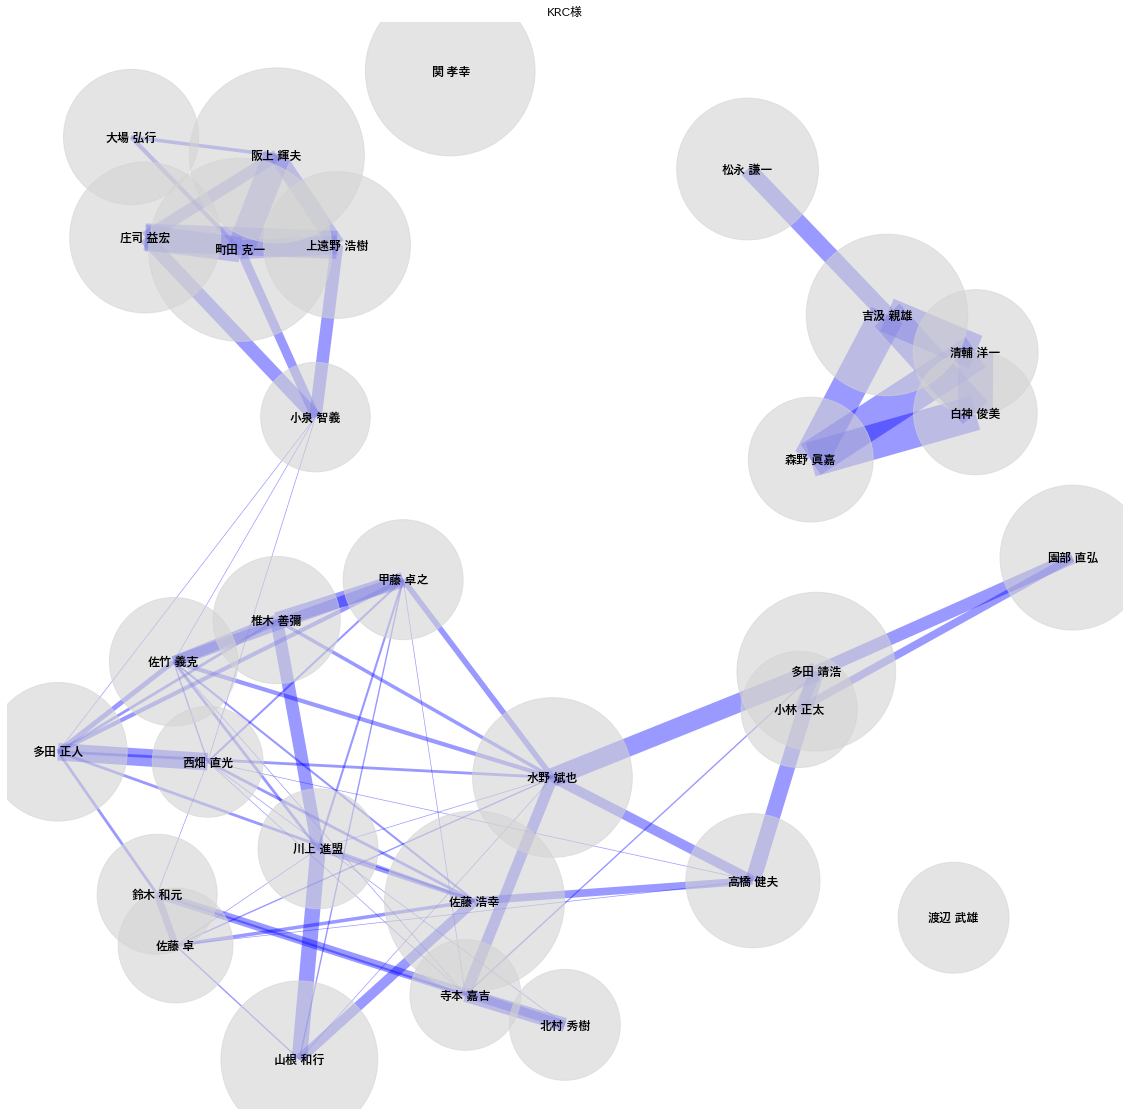

,from,to,from_id,to_id,group,Volume
0,町田 克一,大場 弘行,0,13,0,4.2
1,町田 克一,阪上 輝夫,0,2,0,27.3
2,町田 克一,庄司 益宏,0,8,0,25.2
3,町田 克一,上遠野 浩樹,0,9,0,18.9
4,町田 克一,小泉 智義,0,29,0,9.1


,from,from_id,node_volume
0,町田 克一,0,33600
1,佐藤 浩幸,1,32400
2,阪上 輝夫,2,30600
3,関 孝幸,3,28800
4,吉汲 親雄,4,26100


[('町田 克一', 112),
 ('佐藤 浩幸', 108),
 ('阪上 輝夫', 102),
 ('関 孝幸', 96),
 ('吉汲 親雄', 87),
 ('水野 斌也', 85),
 ('多田 靖浩', 84),
 ('山根 和行', 82),
 ('庄司 益宏', 76),
 ('上遠野 浩樹', 72)]

,0,1,2,3
0,海田 泰久,森川 淳平,片山 葉月,None
1,廣崎 敏晃,None,None,None
2,乾 正孝,None,None,None
3,海田 泰久,None,None,None
4,海田 泰久,None,None,None


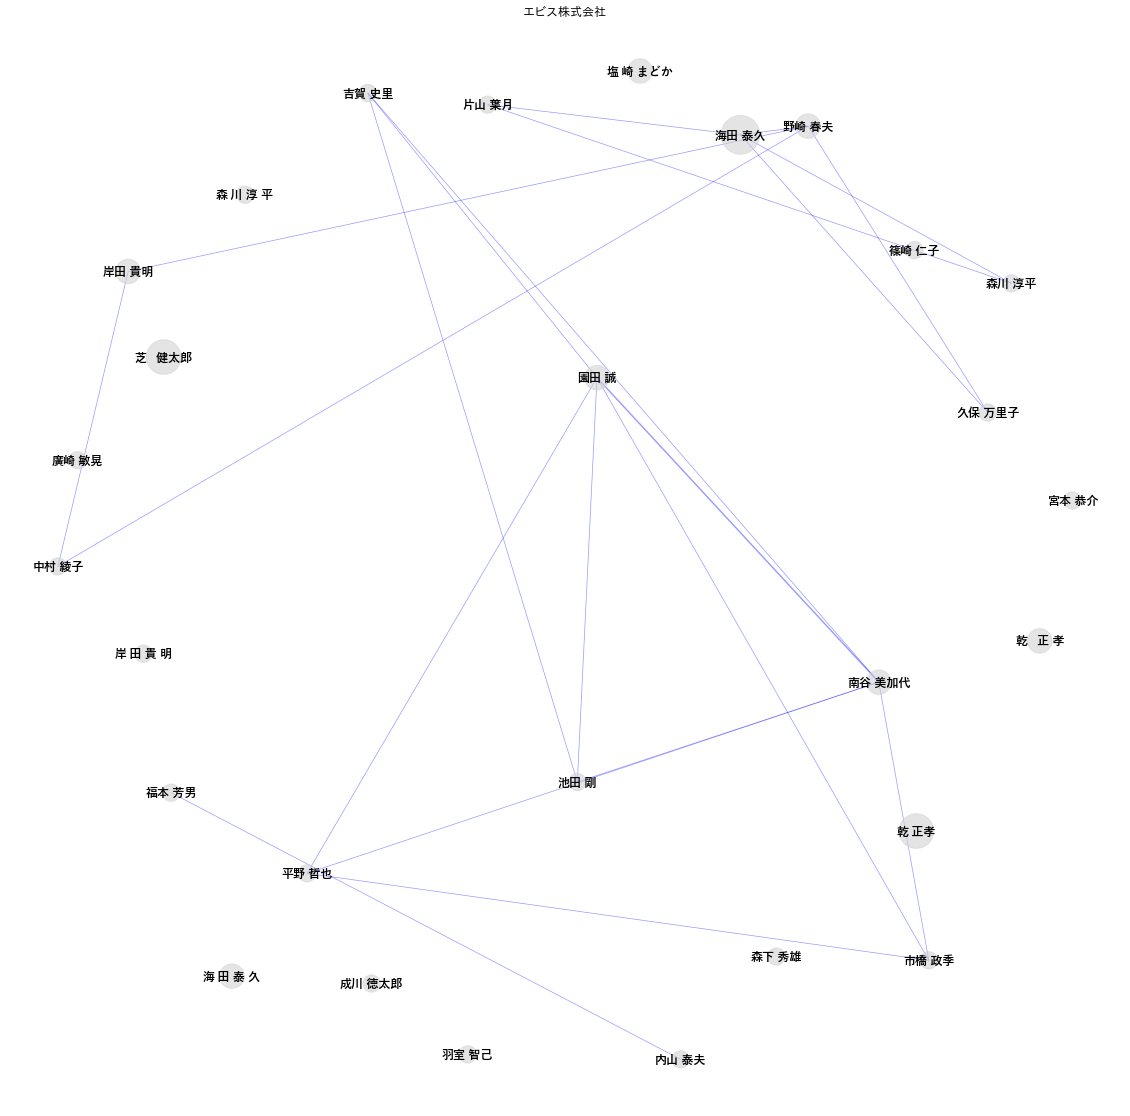

,from,to,from_id,to_id,group,Volume
0,海田 泰久,森川 淳平,0,10,0,0.7
1,海田 泰久,片山 葉月,0,11,0,0.7
2,海田 泰久,久保 万里子,0,18,0,0.7
3,海田 泰久,野崎 春夫,0,9,0,0.7
4,園田 誠,吉賀 史里,3,13,0,0.7


,from,from_id,node_volume
0,海田 泰久,0,1500
1,乾 正孝,1,1200
2,芝 健太郎,2,1200
3,園田 誠,3,600
4,南谷 美加代,4,600


[('海田 泰久', 5),
 ('乾 正孝', 4),
 ('芝   健太郎', 4),
 ('園田 誠', 2),
 ('南谷 美加代', 2),
 ('乾   正 孝', 2),
 ('塩 崎 まどか', 2),
 ('海 田 泰 久', 2),
 ('岸田 貴明', 2),
 ('野崎 春夫', 2)]

,0,1,2,3,4,5,6,7,8
0,斉藤 雄太,None,None,None,None,None,None,None,None
1,高田 依里,高橋 史帆,大橋 康典,山田 竜彦,焼田 悠介,三村 大輔,None,None,None
2,二村 晴美,渡邊 修平,None,None,None,None,None,None,None
3,村山 駿,難波 誉昌,None,None,None,None,None,None,None
4,熊倉 健太,None,None,None,None,None,None,None,None


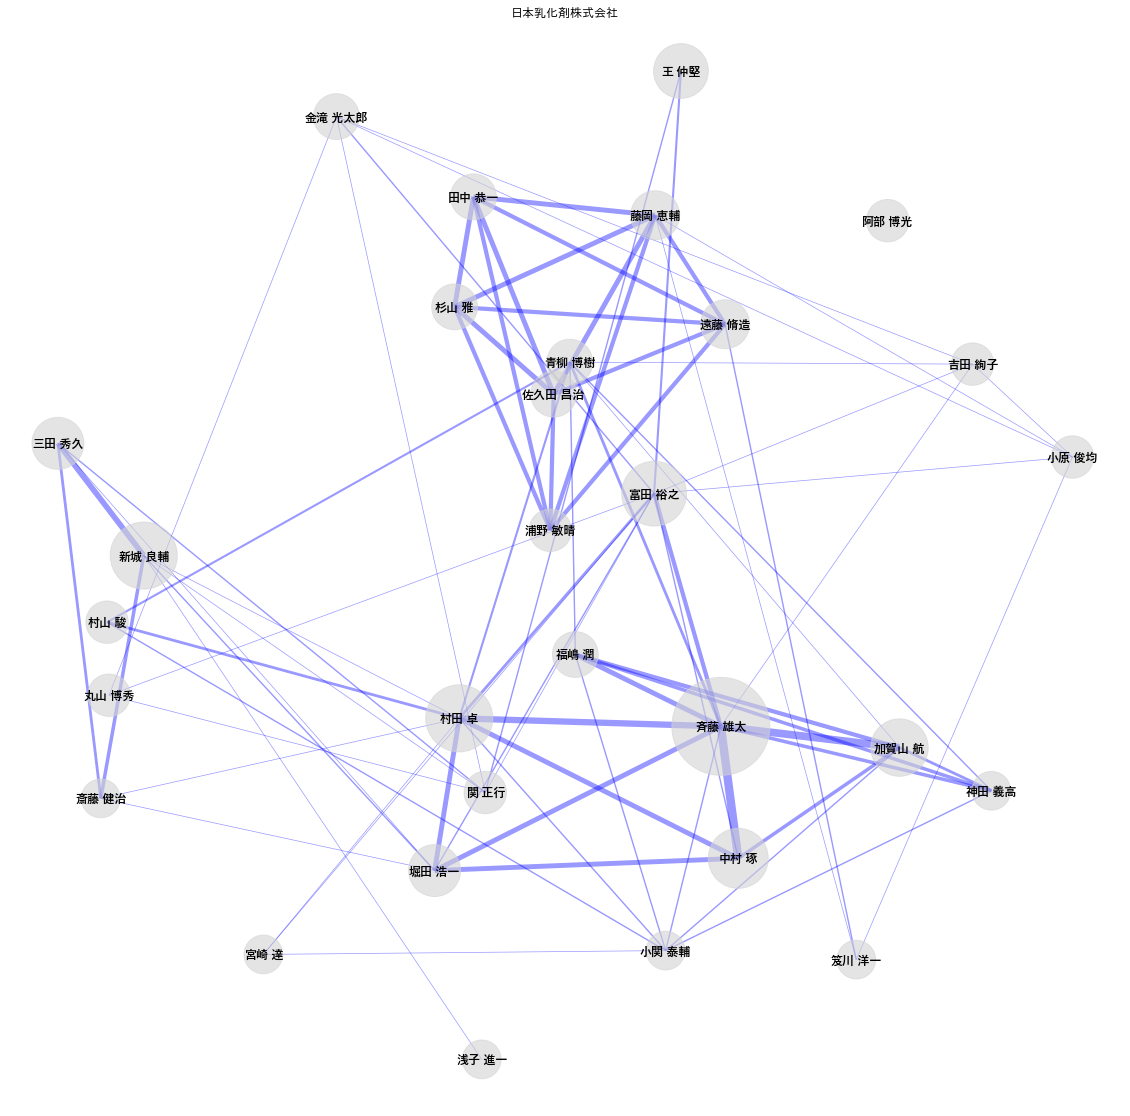

,from,to,from_id,to_id,group,Volume
0,斉藤 雄太,青柳 博樹,0,11,0,2.8
1,斉藤 雄太,吉田 絢子,0,18,0,0.7
2,斉藤 雄太,加賀山 航,0,5,0,7.7
3,斉藤 雄太,福嶋 潤,0,12,0,4.9
4,斉藤 雄太,神田 義高,0,26,0,3.5


,from,from_id,node_volume
0,斉藤 雄太,0,9600
1,村田 卓,1,4500
2,新城 良輔,2,4500
3,富田 裕之,3,4200
4,中村 琢,4,3600


[('斉藤 雄太', 32),
 ('村田 卓', 15),
 ('新城 良輔', 15),
 ('富田 裕之', 14),
 ('中村 琢', 12),
 ('加賀山 航', 11),
 ('王 仲堅', 10),
 ('堀田 浩一', 9),
 ('三田 秀久', 9),
 ('藤岡 恵輔', 8)]

,0,1,2
0,井上 達也,横田 博志,福田 一比古
1,井上 彰,None,None


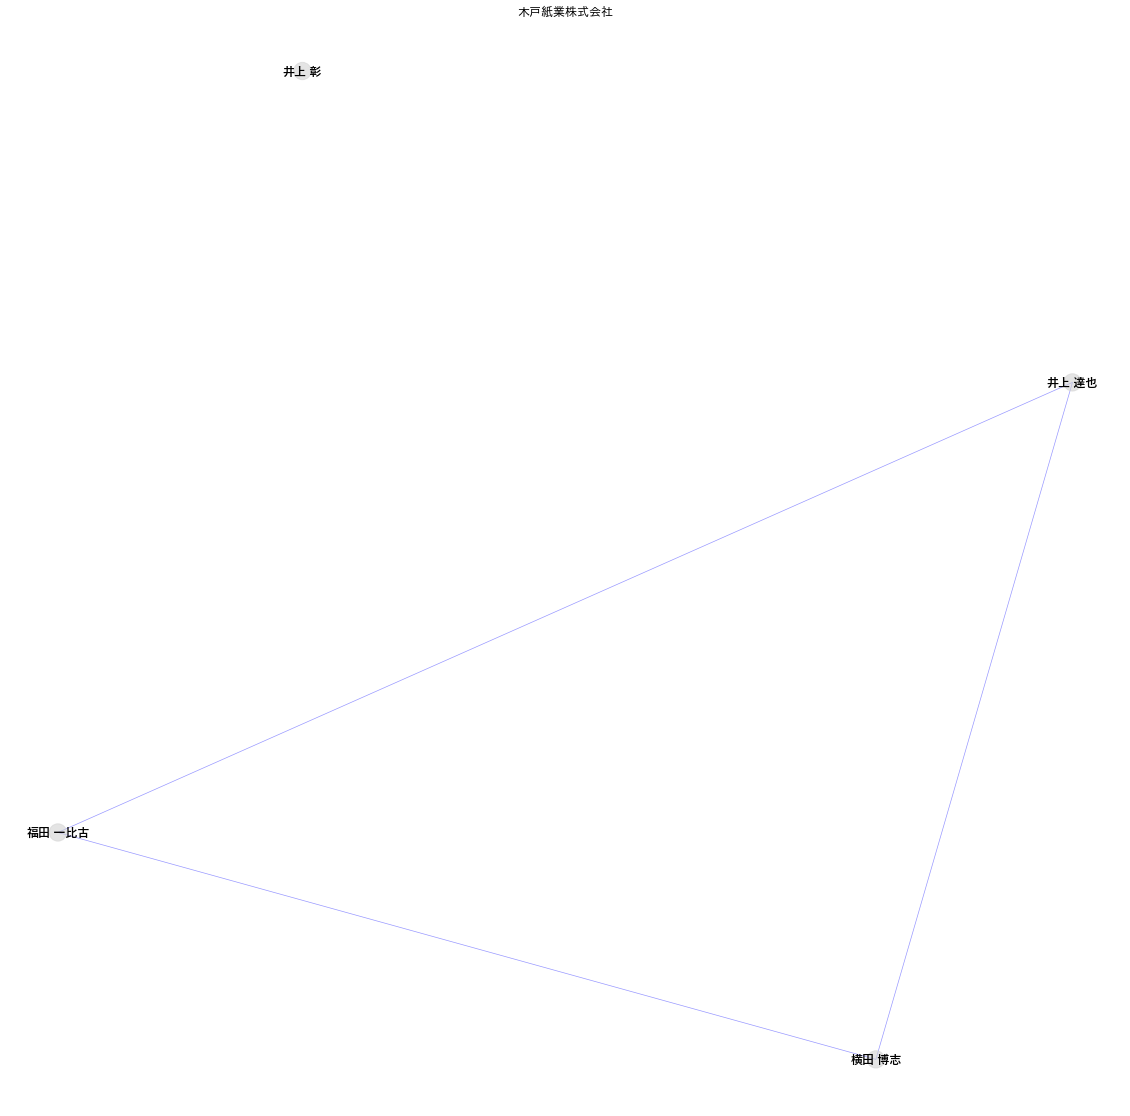

,from,to,from_id,to_id,group,Volume
0,井上 達也,横田 博志,0,1,0,0.7
1,井上 達也,福田 一比古,0,2,0,0.7
2,横田 博志,福田 一比古,1,2,0,0.7


,from,from_id,node_volume
0,井上 達也,0,300
1,横田 博志,1,300
2,福田 一比古,2,300
3,井上 彰,3,300


[('井上 達也', 1), ('横田 博志', 1), ('福田 一比古', 1), ('井上 彰', 1)]

,0,1,2,3,4
0,梅村 一之,野田 剛,吉澤 孝之,None,None
1,鈴木 克彦,山野辺 輝,山本 大貴,川崎 輝久,None
2,鈴木 克彦,山野辺 輝,山本 大貴,堀越 強志,None
3,鈴木 克彦,山野辺 輝,山本 大貴,伊藤 志保,None
4,吉村 壽次,山浦 政則,鈴木 克彦,山野辺 輝,None


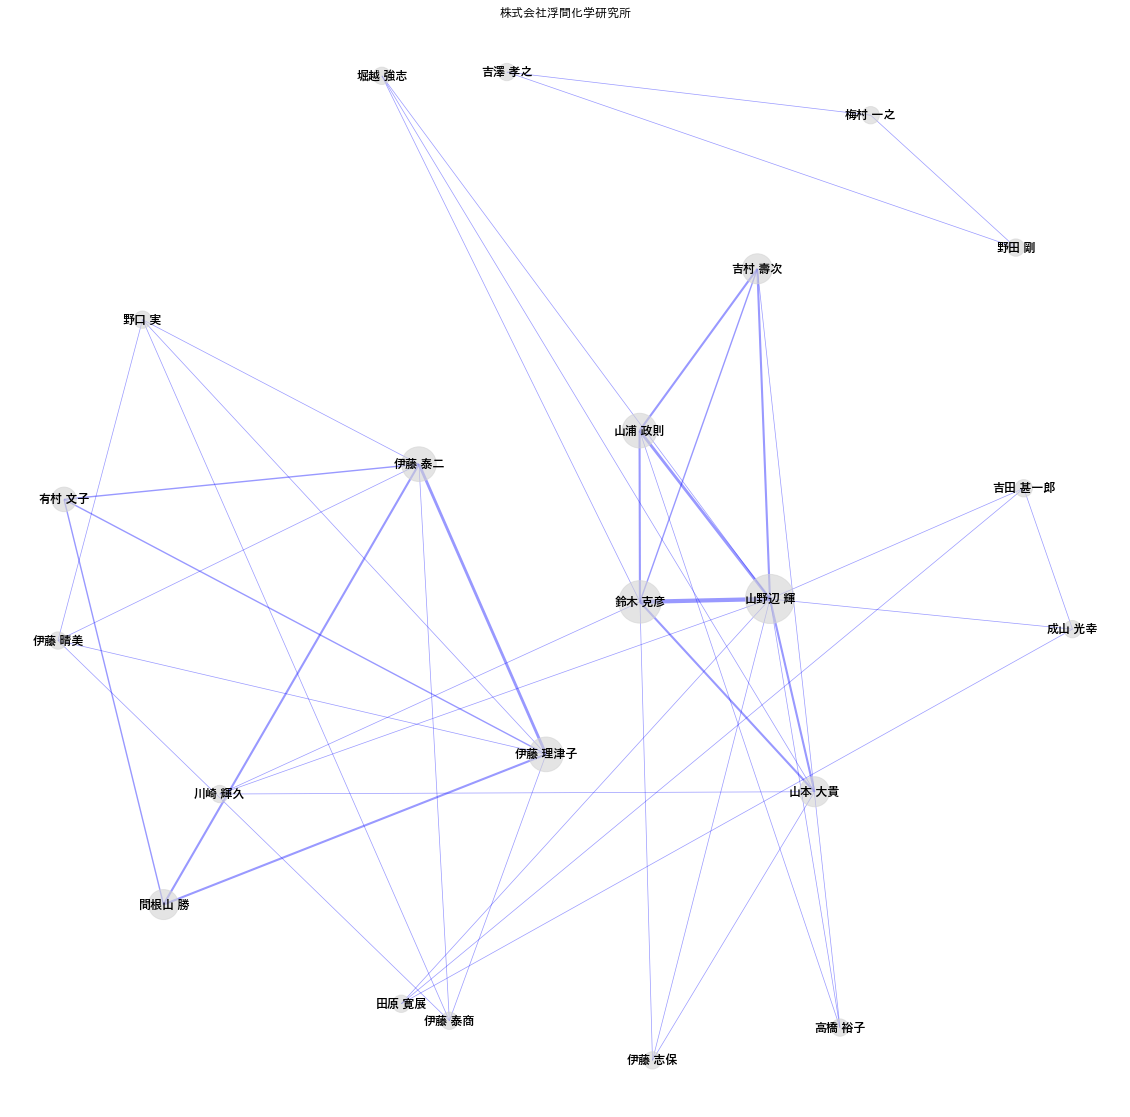

,from,to,from_id,to_id,group,Volume
0,山野辺 輝,鈴木 克彦,0,1,0,4.2
1,山野辺 輝,山本 大貴,0,5,0,2.1
2,山野辺 輝,川崎 輝久,0,12,0,0.7
3,山野辺 輝,堀越 強志,0,13,0,0.7
4,山野辺 輝,伊藤 志保,0,14,0,0.7


,from,from_id,node_volume
0,山野辺 輝,0,2400
1,鈴木 克彦,1,1800
2,山浦 政則,2,1200
3,伊藤 泰二,3,1200
4,伊藤 理津子,4,1200


[('山野辺 輝', 8),
 ('鈴木 克彦', 6),
 ('山浦 政則', 4),
 ('伊藤 泰二', 4),
 ('伊藤 理津子', 4),
 ('山本 大貴', 3),
 ('吉村 壽次', 3),
 ('間根山 勝', 3),
 ('有村 文子', 2),
 ('梅村 一之', 1)]

,0,1,2,3,4,5,6,7,8,9,10
0,梁 明秀,山岡 悠太郎,相澤 大輔,None,None,None,None,None,None,None,None
1,津田 貴大,徳久 智明,森田 智之,清水 寿和,None,None,None,None,None,None,None
2,相澤 大輔,None,None,None,None,None,None,None,None,None,None
3,佐藤 輝幸,西尾 太一,吉廣 大佑,岩井 新,新内 聡暢,None,None,None,None,None,None
4,高橋 秀樹,荻原 えりな,廖 本男,呉 柏衡,李 懿,None,None,None,None,None,None


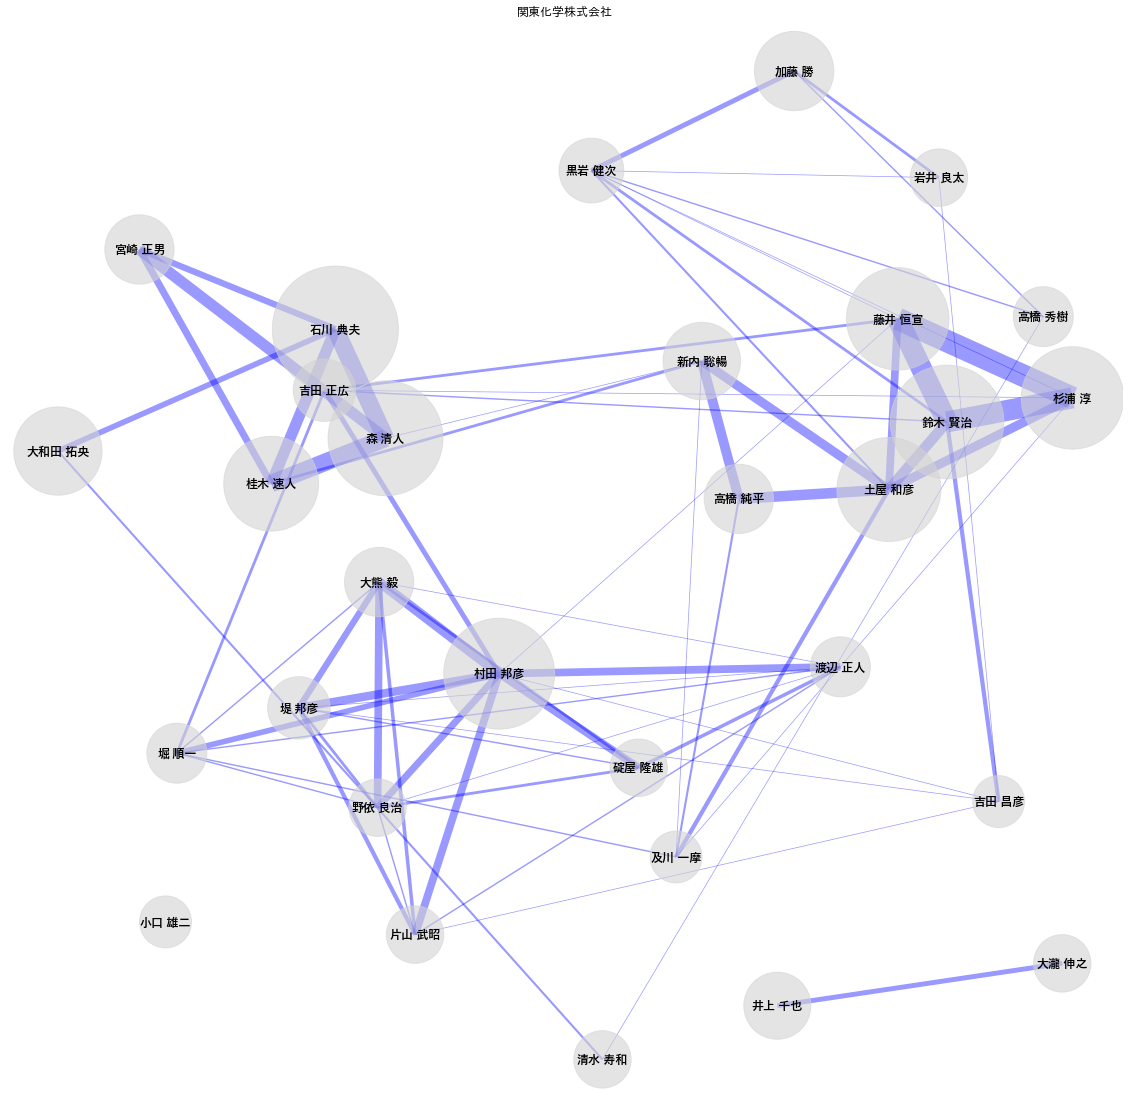

,from,to,from_id,to_id,group,Volume
0,石川 典夫,大和田 拓央,0,8,0,5.6
1,石川 典夫,森 清人,0,1,0,17.5
2,石川 典夫,宮崎 正男,0,13,0,6.3
3,石川 典夫,桂木 速人,0,7,0,11.2
4,森 清人,新内 聡暢,1,10,0,0.7


,from,from_id,node_volume
0,石川 典夫,0,15900
1,森 清人,1,13200
2,鈴木 賢治,2,12900
3,村田 邦彦,3,12300
4,土屋 和彦,4,10800


[('石川 典夫', 53),
 ('森 清人', 44),
 ('鈴木 賢治', 43),
 ('村田 邦彦', 41),
 ('土屋 和彦', 36),
 ('杉浦 淳', 35),
 ('藤井 恒宣', 35),
 ('桂木 速人', 30),
 ('大和田 拓央', 26),
 ('加藤 勝', 21)]

In [80]:
df_companys = []
for file in allfiles:
    df = pd.read_excel(file, skiprows=2) # '2022_0124_関東化学株式会社.xlsx'
    file_temp = file.split('_')[2]
    file_temp = file_temp.split('.x')[0]
    df = df[['出願日', '発明等の名称', '発明者または考案者(最新)']]
    df['発明者または考案者(最新)'] = df['発明者または考案者(最新)'].str.replace('　', ' ')
    df2 = pd.concat([df, df['発明者または考案者(最新)'].str.split(';', expand=True)], axis=1).drop('発明者または考案者(最新)', axis=1)
    drop_columns = ['出願日', '発明等の名称']
    df3 = df2.drop(drop_columns, axis=1)
    test_dict = df3.values.tolist()
    display(df3.head())

    temp = []
    for test in test_dict:
        #print(test)
        temp_test = [x for x in test if x is not None]
        temp.append(temp_test)
    #display(temp)

    tags_list = temp

    tag_count = collections.Counter(itertools.chain.from_iterable(tags_list)).most_common(30)
    
    #display(tag_count)

    import networkx as nx
    G = nx.Graph()
    G.add_nodes_from([(tag, {"count":count}) for tag,count in tag_count])

    for tags in tags_list:
        for node0,node1 in itertools.combinations(tags, 2):
            if not G.has_node(node0) or not G.has_node(node1):
                continue
            if G.has_edge(node0, node1):
                G[node0][node1]["weight"] += 1
            else:
                G.add_edge(node0, node1, weight=1)

    for (u,v,d) in list(G.edges(data=True)):
        if d["weight"] <= 0:
            G.remove_edge(u, v)

    for i in range(1):
        plt.figure(figsize=(20,20))
        pos = nx.spring_layout(G, k=2.0, seed=0)

        node_size = [ d['count']*300 for (n,d) in G.nodes(data=True)]
        nx.draw_networkx_nodes(G, pos, node_color='lightgray',alpha=0.6, node_size=node_size)
        nx.draw_networkx_labels(G, pos, font_family="Yu Gothic", font_weight="bold")

        edge_width = [ d['weight']*0.7 for (u,v,d) in G.edges(data=True)]
        nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='blue', width=edge_width)

        plt.axis('off')
        plt.title(file_temp)
        plt.savefig("{}.png".format(file_temp))
        plt.show()
        
        test_name = pd.DataFrame(list(G.nodes)) # 描く人のユニークネーム
        #print(len(test))
        test_name = test_name.rename(columns={0:'name'})
        test_name = test_name.reset_index()
        test_name = test_name.rename(columns={'index':'id'})
        test_name['from'] = test_name['name'].copy()
        test_name['to'] = test_name['name'].copy()
        test_name.head()

        test_from = test_name[['from', 'id']]
        test_from = test_from.rename(columns={'id':'from_id'})
        #display(test_from.head())

        test_to = test_name[['to', 'id']]
        test_to = test_to.rename(columns={'id':'to_id'})
        #display(test_to.head())

        #G.edges
        #display(list(G.edges)) # つながり
        #print(len(list(G.edges)))
        temp_connection_list = pd.DataFrame(list(G.edges))
        temp_connection_list = temp_connection_list.rename(columns={0:'from'})
        temp_connection_list = temp_connection_list.rename(columns={1:'to'})
        temp_connection_list.head()

        #display(edge_width) # 線の太さ
        #display(len(edge_width))
        temp_edge_width = pd.DataFrame(edge_width)
        temp_edge_width = temp_edge_width.rename(columns={0:'edge_Volume'})
        #temp_edge_width.head()

        # マージ
        temp = pd.merge(temp_connection_list, temp_edge_width, left_index=True, right_index=True)
        #temp.head()

        temp = pd.merge(temp, test_from, on='from', how='left')
        temp = pd.merge(temp, test_to, on='to', how='left')
        temp['group'] = 0
        temp = temp[['from', 'to', 'from_id', 'to_id', 'group', 'edge_Volume']]
        display(temp.head())
        
        #temp.to_csv('base_connection_data_{}.csv'.format(file_temp), encoding='cp932', index=None)

        #print(len(node_size)) # 円の大きさ
        df_node_volume = pd.DataFrame(node_size)
        df_node_volume = df_node_volume.rename(columns={0:'node_Volume'})
        #display(df_node_volume.head())

        # マージする
        temp_volume = pd.merge(test_from, df_node_volume, left_index=True, right_index=True)
        temp_volume = temp_volume[['from','node_Volume']]
        display(temp_volume.head())
        
        # マージする
        temp = pd.merge(temp_volume, temp, on='from', how='left')
        temp = temp[['from', 'to', 'from_id', 'to_id', 'group', 'edge_Volume', 'node_Volume']]
        df_company = temp.copy()
        display(temp.head())
        df_companys.append(df_company)
        
        #tempe.to_csv('node_volume_data_{}.csv'.format(file_temp), encoding='cp932', index=None)

    tag_count_name = tag_count

    display(tag_count_name[0:10])

    name_list = []
    for name in list(tag_count_name):
        #print(name)
        name_temp = name[0]
        name_list.append(name_temp)
    df_name = pd.DataFrame(name_list)
    name_list_temp = list(df_name[0].unique())
    #print(name_list_temp)

df = pd.con